In [1]:
# Import libraries
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import classification_report, accuracy_score

In [2]:
#load dataset
df = pd.read_csv(r'C:\Users\Saheed K\OneDrive\Desktop\Project Entri.csv')
df.head()

,Indicator Category,Indicator,Year,Gender,Race/ Ethnicity,Value,Place,BCHC Requested Methodology,Source,Methods,Notes
0,HIV/AIDS,"AIDS Diagnoses Rate (Per 100,000 people)",2013,Both,All,30.4,"Atlanta (Fulton County), GA","AIDS cases diagnosed in 2012, 2013, 2014 (as a...",Diagnoses numbers were obtained from the Georg...,NaN,NaN
1,HIV/AIDS,"AIDS Diagnoses Rate (Per 100,000 people)",2012,Both,All,39.6,"Atlanta (Fulton County), GA","AIDS cases diagnosed in 2012, 2013, 2014 (as a...",Diagnoses numbers were obtained from the Georg...,NaN,NaN
2,HIV/AIDS,"AIDS Diagnoses Rate (Per 100,000 people)",2011,Both,All,41.7,"Atlanta (Fulton County), GA","AIDS cases diagnosed in 2012, 2013, 2014 (as a...",Diagnoses numbers were obtained from the Georg...,NaN,NaN
3,Cancer,All Types of Cancer Mortality Rate (Age-Adjust...,2013,Male,All,195.8,"Atlanta (Fulton County), GA","2012, 2013, 2014; per 100,000 population using...","National Center for Health Statistics (NCHS), CDC",NaN,NaN
4,Cancer,All Types of Cancer Mortality Rate (Age-Adjust...,2013,Female,All,135.5,"Atlanta (Fulton County), GA","2012, 2013, 2014; per 100,000 population using...","National Center for Health Statistics (NCHS), CDC",NaN,NaN


In [3]:
#Basic info and checks
print(df.shape)
df.info()
df.describe()

(13512, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13512 entries, 0 to 13511
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Indicator Category          13512 non-null  object 
 1   Indicator                   13512 non-null  object 
 2   Year                        13512 non-null  object 
 3   Gender                      13512 non-null  object 
 4   Race/ Ethnicity             13512 non-null  object 
 5   Value                       13499 non-null  float64
 6   Place                       13512 non-null  object 
 7   BCHC Requested Methodology  13004 non-null  object 
 8   Source                      11222 non-null  object 
 9   Methods                     4232 non-null   object 
 10  Notes                       3541 non-null   object 
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


,Value
count,13499.000000
mean,285.688562
std,3192.666847
min,0.000000
25%,7.000000
50%,16.100000
75%,45.200000
max,80977.000000


In [4]:
#Check  missing Values 
print(df.isnull().sum())

Indicator Category               0
Indicator                        0
Year                             0
Gender                           0
Race/ Ethnicity                  0
Value                           13
Place                            0
BCHC Requested Methodology     508
Source                        2290
Methods                       9280
Notes                         9971
dtype: int64


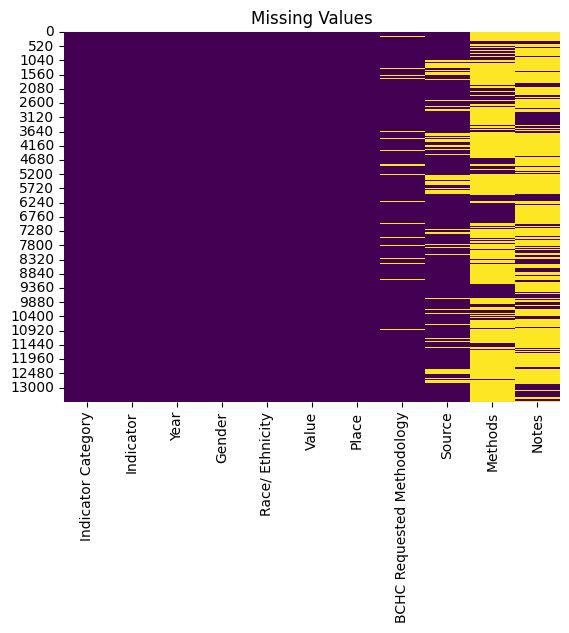

In [5]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values")
plt.show()

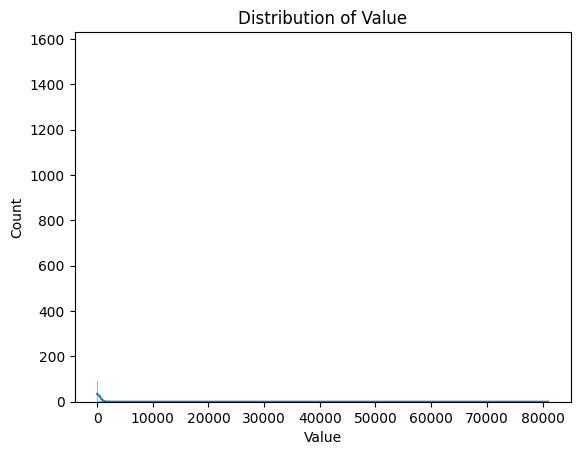

In [6]:
# Distribution of target variable
sns.histplot(df['Value'], kde=True)
plt.title("Distribution of Value")
plt.show()

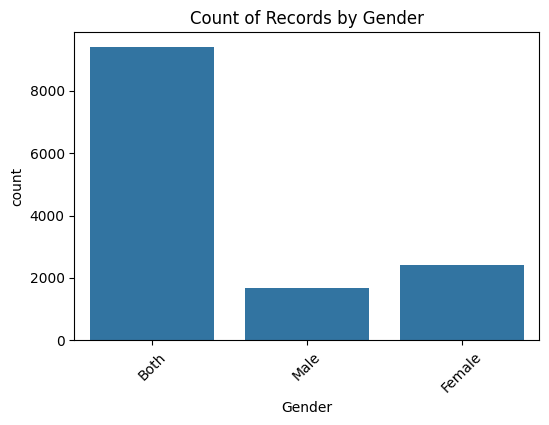

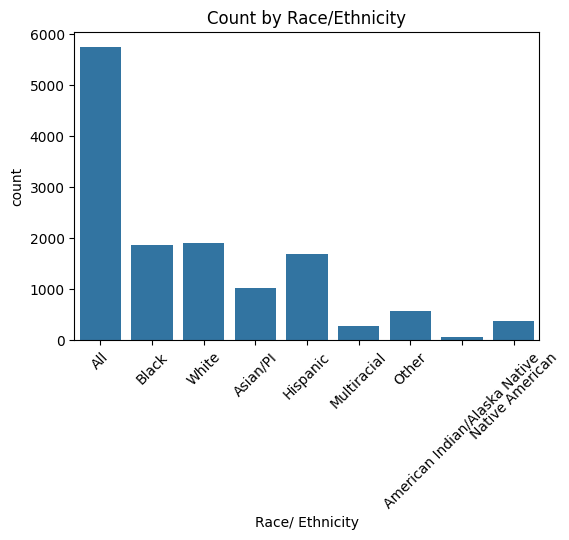

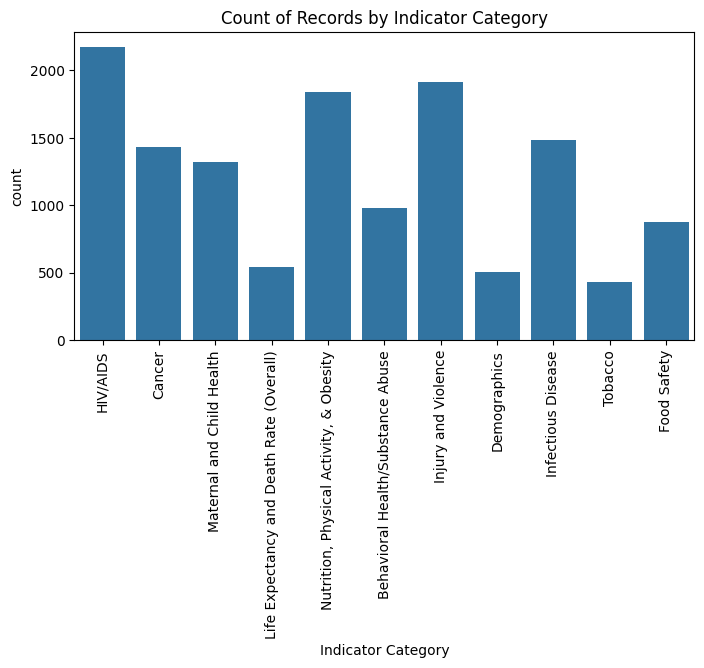

In [7]:
# Count plot for Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')
plt.title("Count of Records by Gender")
plt.xticks(rotation=45)
plt.show()
# Count plot for Race/ Ethnicity
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Race/ Ethnicity')
plt.title("Count by Race/Ethnicity")
plt.xticks(rotation=45)
plt.show()

# Count plot for Indicator Category
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Indicator Category')
plt.title("Count of Records by Indicator Category")
plt.xticks(rotation=90)
plt.show()

In [8]:
# Clean 'Year' column to make sure it is numeric
df['Year'] = df['Year'].astype(str).str[:4]
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

In [9]:
# Drop rows with missing values
df.dropna(inplace=True)

In [10]:
# Drop unnecessary columns
df.drop(['BCHC Requested Methodology', 'Source', 'Methods', 'Notes'], axis=1, inplace=True)

In [11]:
le = LabelEncoder()
cat_cols = ['Indicator Category', 'Indicator', 'Gender', 'Race/ Ethnicity', 'Place']

for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [12]:
X = df.drop(['Value'], axis=1) 
y = df['Value']   

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [18]:
#Regression Output Visualization

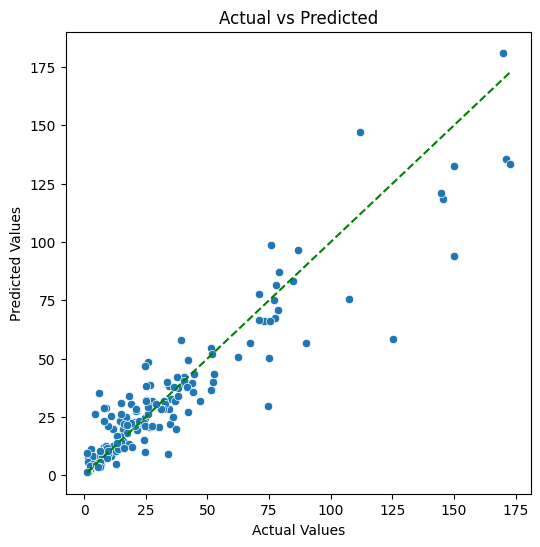

In [19]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g--')
plt.show()

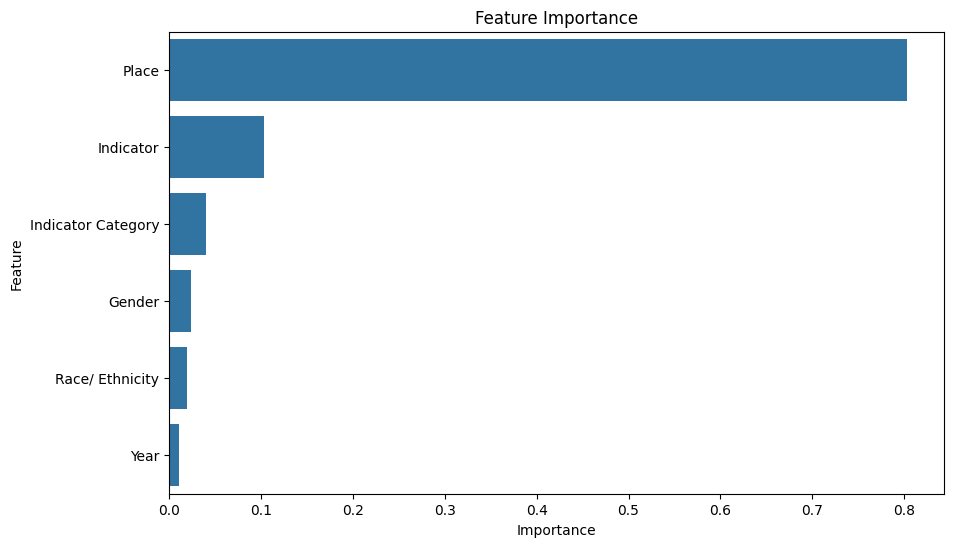

In [20]:
importances = model.feature_importances_
feature_names = X.columns
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_df, x='Importance', y='Feature')
plt.title("Feature Importance")
plt.show()

In [21]:
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R² Score: 0.8695693418150254
Mean Squared Error: 161.28317572625716
